In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
#performing data augmentation to train the data
x_train=train_datagen.flow_from_directory(r'C:\Users\ELCOT\Documents\Dataset\TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data augmentation to test the data
x_test=test_datagen.flow_from_directory(r'C:\Users\ELCOT\Documents\Dataset\TEST_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')


Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [4]:
print(x_train.class_indices)#checking  the no. of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [5]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [6]:
###Importing Necessary Libraries

In [7]:
import numpy as np

In [8]:
import tensorflow

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras import layers

In [11]:
from tensorflow.keras.layers import Dense,Flatten

In [12]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
model=Sequential()

In [15]:
###Creating the model

In [16]:
classifier = Sequential()

In [17]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64,64,3),activation='relu'))

In [18]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
classifier.add(Conv2D(32, (3,3),activation='relu'))

In [20]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
classifier.add(Flatten())

In [22]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5,activation='softmax'))

In [23]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [24]:
###Compiling the model

In [25]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20,validation_data=x_test,validation_steps = len(x_test))

C:\Users\ELCOT\AppData\Local\Temp/ipykernel_12484/2938698048.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20,validation_data=x_test,validation_steps = len(x_test))


Epoch 1/20
526/526 [==============================] - 114s 207ms/step - loss: 0.1662 - accuracy: 0.9368 - val_loss: 0.0189 - val_accuracy: 0.9905
Epoch 2/20
526/526 [==============================] - 104s 197ms/step - loss: 0.0628 - accuracy: 0.9867 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/20
526/526 [==============================] - 101s 192ms/step - loss: 4.1233e-04 - accuracy: 1.0000 - val_loss: 6.8265e-04 - val_accuracy: 1.0000
Epoch 4/20
526/526 [==============================] - 89s 170ms/step - loss: 8.9122e-05 - accuracy: 1.0000 - val_loss: 2.7195e-04 - val_accuracy: 1.0000
Epoch 5/20
526/526 [==============================] - 95s 180ms/step - loss: 8.1831e-05 - accuracy: 1.0000 - val_loss: 1.0187e-04 - val_accuracy: 1.0000
Epoch 6/20
526/526 [==============================] - 76s 144ms/step - loss: 0.0323 - accuracy: 0.9928 - val_loss: 0.3380 - val_accuracy: 0.9232
Epoch 7/20
526/526 [==============================] - 83s 157ms/step - loss: 0.0528 - accuracy: 0.9848 

In [27]:
###Saving our model

In [28]:
classifier.save('nutrition.h5')

In [29]:
import numpy as np
from tensorflow.keras.models  import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model = load_model('nutrition.h5')

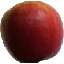

In [31]:
img = image.load_img(r'C:\Users\ELCOT\Documents\Dataset\TRAIN_SET\APPLES\5_100.jpg',grayscale=False,target_size= (64,64))
img

In [32]:
import numpy as np
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

In [33]:
x.shape

(1, 64, 64, 3)

In [34]:
pred = np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 4s 4s/step


In [35]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']

In [36]:
index[pred[0]]

'APPLES'